In [1]:
import pandas as pd

# df = pd.read_parquet("initial_train_set.parquet")
df = pd.read_parquet("active_labeled.parquet")
df

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
155,data/imagenette/7/02080.jpg,gas pump
156,data/imagenette/1/02552.jpg,English springer
157,data/imagenette/5/03602.jpg,French horn
158,data/imagenette/9/01773.jpg,parachute


In [2]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")

2025-01-13 13:41:16.895 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, filepath_col="filepath", label_col="label")

2025-01-13 13:41:16.916 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-13 13:41:16.916 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-13 13:41:17.389 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-13 13:41:17.517 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
155,data/imagenette/7/02080.jpg,gas pump
156,data/imagenette/1/02552.jpg,English springer
157,data/imagenette/5/03602.jpg,French horn
158,data/imagenette/9/01773.jpg,parachute


2025-01-13 13:41:17.529 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-13 13:41:26.771 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.0020892962347716093


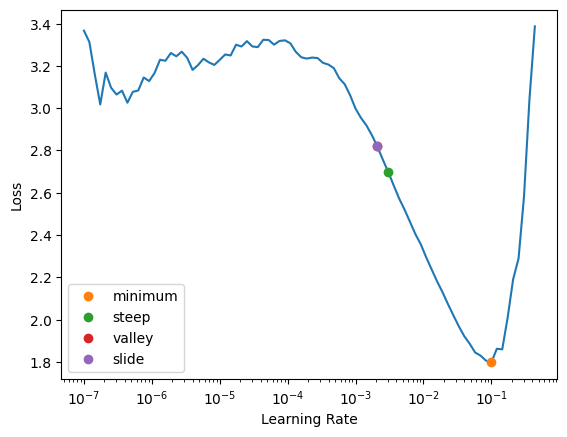

In [5]:
al.lr_find()

2025-01-13 13:41:27.035 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.301886,2.028934,0.312500,00:01


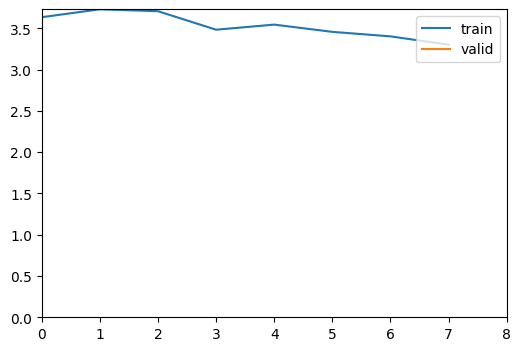

epoch,train_loss,valid_loss,accuracy,time
0,2.308051,1.104648,0.593750,00:01
1,1.751878,0.706590,0.781250,00:01
2,1.442973,0.685912,0.781250,00:01


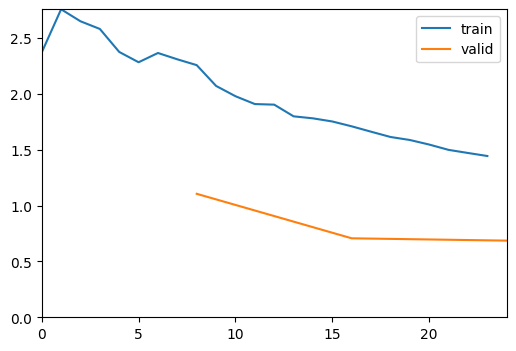

In [6]:
al.train(epochs=3, lr=1e-3)

In [7]:
df = pd.read_parquet("evaluation_samples.parquet").drop(columns=["label_name"])
filepaths = df["filepath"].tolist()

filepaths

['data/imagenette/2/00000.jpg',
 'data/imagenette/2/00001.jpg',
 'data/imagenette/2/00002.jpg',
 'data/imagenette/2/00003.jpg',
 'data/imagenette/2/00004.jpg',
 'data/imagenette/2/00005.jpg',
 'data/imagenette/2/00006.jpg',
 'data/imagenette/2/00007.jpg',
 'data/imagenette/2/00008.jpg',
 'data/imagenette/2/00009.jpg',
 'data/imagenette/2/00010.jpg',
 'data/imagenette/2/00011.jpg',
 'data/imagenette/2/00012.jpg',
 'data/imagenette/2/00013.jpg',
 'data/imagenette/2/00014.jpg',
 'data/imagenette/2/00015.jpg',
 'data/imagenette/2/00016.jpg',
 'data/imagenette/2/00017.jpg',
 'data/imagenette/2/00018.jpg',
 'data/imagenette/2/00019.jpg',
 'data/imagenette/2/00020.jpg',
 'data/imagenette/2/00021.jpg',
 'data/imagenette/2/00022.jpg',
 'data/imagenette/2/00023.jpg',
 'data/imagenette/2/00024.jpg',
 'data/imagenette/2/00025.jpg',
 'data/imagenette/2/00026.jpg',
 'data/imagenette/2/00027.jpg',
 'data/imagenette/2/00028.jpg',
 'data/imagenette/2/00029.jpg',
 'data/imagenette/2/00030.jpg',
 'data/i

In [8]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df

2025-01-13 13:41:33.027 | INFO     | active_vision.core:predict:77 - Running inference on 3925 samples


,filepath,pred_label,pred_conf
0,data/imagenette/2/00000.jpg,cassette player,0.226847
1,data/imagenette/2/00001.jpg,cassette player,0.206636
2,data/imagenette/2/00002.jpg,cassette player,0.229620
3,data/imagenette/2/00003.jpg,cassette player,0.191104
4,data/imagenette/2/00004.jpg,cassette player,0.230188
...,...,...,...
3920,data/imagenette/5/03920.jpg,French horn,0.231787
3921,data/imagenette/5/03921.jpg,French horn,0.216592
3922,data/imagenette/5/03922.jpg,French horn,0.229004
3923,data/imagenette/5/03923.jpg,French horn,0.226682


In [9]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=10)
uncertain_df

2025-01-13 13:41:37.071 | INFO     | active_vision.core:sample_uncertain:119 - Getting top 10 low confidence samples


,filepath,pred_label,pred_conf
754,data/imagenette/3/00754.jpg,tench,0.109356
777,data/imagenette/3/00777.jpg,French horn,0.109440
1096,data/imagenette/3/01096.jpg,parachute,0.110282
1101,data/imagenette/3/01101.jpg,French horn,0.110618
3447,data/imagenette/6/03447.jpg,church,0.111190
3494,data/imagenette/6/03494.jpg,French horn,0.111402
2166,data/imagenette/7/02166.jpg,tench,0.111524
790,data/imagenette/3/00790.jpg,gas pump,0.111961
3400,data/imagenette/6/03400.jpg,garbage truck,0.112718
3522,data/imagenette/6/03522.jpg,parachute,0.112790


In [10]:
al.label(uncertain_df, output_filename="uncertain")

2025-01-13 13:41:38.184 | INFO     | active_vision.core:label:151 - Launching labeling interface for 10 samples


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [11]:
labeled_df = pd.read_parquet("uncertain.parquet")

labeled_df


,filepath,label
0,data/imagenette/2/00086.jpg,cassette player
1,data/imagenette/5/03575.jpg,French horn
2,data/imagenette/6/03323.jpg,garbage truck
3,data/imagenette/0/00535.jpg,tench
4,data/imagenette/7/02262.jpg,gas pump
...,...,...
65,data/imagenette/6/03494.jpg,garbage truck
66,data/imagenette/7/02166.jpg,gas pump
67,data/imagenette/3/00790.jpg,chain saw
68,data/imagenette/6/03400.jpg,garbage truck


In [12]:
al.add_to_train_set(labeled_df, output_filename="active_labeled")

2025-01-13 13:42:31.450 | INFO     | active_vision.core:add_to_train_set:272 - Adding 70 samples to training set
2025-01-13 13:42:31.453 | INFO     | active_vision.core:add_to_train_set:281 - Saved training set to active_labeled.parquet


In [13]:
test_df = pd.read_parquet("evaluation_samples.parquet")
test_df = test_df.rename(columns={"label_name": "label"})
test_df


,filepath,label
0,data/imagenette/2/00000.jpg,cassette player
1,data/imagenette/2/00001.jpg,cassette player
2,data/imagenette/2/00002.jpg,cassette player
3,data/imagenette/2/00003.jpg,cassette player
4,data/imagenette/2/00004.jpg,cassette player
...,...,...
3920,data/imagenette/5/03920.jpg,French horn
3921,data/imagenette/5/03921.jpg,French horn
3922,data/imagenette/5/03922.jpg,French horn
3923,data/imagenette/5/03923.jpg,French horn


In [14]:
al.evaluate(test_df, filepath_col="filepath", label_col="label")

2025-01-13 13:42:36.478 | INFO     | active_vision.core:evaluate:112 - Accuracy: 87.18%


0.8718471337579617